# Spring 2023 : CS5720
### Neural Networks & Deep Learning ICP_7 : Jahnavi Chadalavada (700728443)

Deep Learning Image Classification with CNN
1. Training the model
2. Evaluating the model

Programming elements:
1. About CNN
2. Hyperparameters of CNN
3. Image classification with CNN

### 1. Follow the instruction below and then report how the performance changed(apply all at once)
• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.

• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.• Max Pool layer with size 2×2.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.• Dropout layer at 20%.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.• Max Pool layer with size 2×2.

• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.• Dropout layer at 20%.

• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.• Max Pool layer with size 2×2.

• Flatten layer.• Dropout layer at 20%.

• Fully connected layer with 1024 units and a rectifier activation function.• Dropout layer at 20%.

• Fully connected layer with 512 units and a rectifier activation function.• Dropout layer at 20%.

• Fully connected output layer with 10 units and a Softmax activation function


### Did the performance change?

Model Accuracy has reduced from 90% to 87% where as validation accuracy improved from 69% to 79%.

Execution time Increased.

Model predicted first four test images correctly with these changes where as previous code predicted one image incorrectly.

In [ ]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# # Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                      

### 2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4 images to check whether or not the model has predicted correctly.

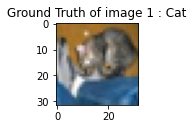

 Ground truth =  Cat     Model prediction =  Cat 



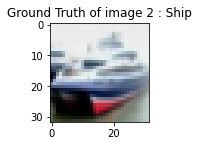

 Ground truth =  Ship     Model prediction =  Ship 



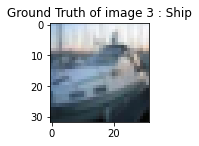

 Ground truth =  Ship     Model prediction =  Ship 



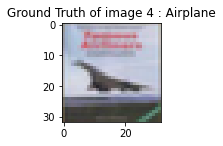

 Ground truth =  Airplane     Model prediction =  Airplane 



In [14]:
# plotting first 4 images of the test data and displaying predicted output
import numpy as np
import matplotlib.pyplot as plt

images = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(4):
  yhat=model.predict(X_test[i].reshape(1, 32, 32, 3),verbose=0)
  predicted_output=np.argmax(yhat,axis=1)
  plt.subplot(2,2,i+1)
  plt.imshow(X_test[i].reshape(32, 32,3))
  plt.title('Ground Truth of image {} : {}'.format(i+1,images[np.where(y_test[i] == 1)[0][0]]))
  plt.show()
  print(f"\033[1;31m Ground truth = \033[1;34m {images[np.where(y_test[i] == 1)[0][0]]}    \033[1;31m Model prediction = \033[1;35m {images[predicted_output[0]]} \n")

### 3. Visualize Loss and Accuracy using the history object

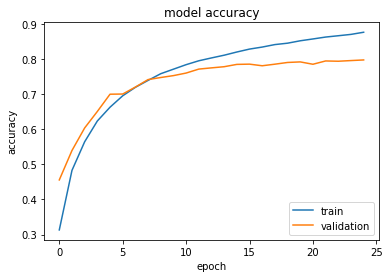

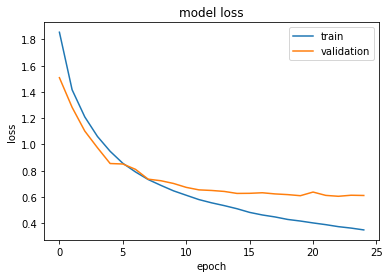

In [13]:
# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()